# **Logisitic Regression**

1. Defination:

Logistic Regression is a statistical model used for classification tasks

It predicts categorical outcomes(e.g "yes" or "no" ,"spam","not spam").

Unlike lnear regression,it outputs probabilities(0,1)

Sigmoid (Logistic) Function
The function used to map input features to probabilities in classification tasks:

𝑔(𝑥)=1 /1+e^x1
​

Simple Linear and Multiple Linear Regression Equation
The general form of a linear regression model:

𝑧
=
𝜃
0
+
𝜃
1
⋅
𝑥
1
+
𝜃
2
⋅
𝑥
2
+
…
z=θ
0
​
 +θ
1
​
 ⋅x
1
​
 +θ
2
​
 ⋅x
2
​
 +…
This slide likely explains how logistic regression uses the sigmoid function to transform linear regression outputs into probabilities.







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Dataset Description:

Feature (X): Number of study hours.

Target (y): Binary classification (1 = Pass, 0 = Fail).

In [2]:
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Study Hours
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 = Fail, 1 = Pass


# 1️⃣ **Splitting Data into Training & Testing Sets**

train_test_split(X, y, test_size=0.2, random_state=42)

Splits X (study hours) and y (pass/fail) into training and test sets.

20% of the data is assigned to the test set (test_size=0.2).

random_state=42 ensures reproducibility.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2️⃣**Training the Logistic Regression Model**

In [4]:
model = LogisticRegression()


# 3️⃣ **Making Predictions**

In [33]:
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 0]


# 4️⃣ **Evaluating the Model**

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


# 5️⃣ **Visualizing the Logistic Regression Curve**

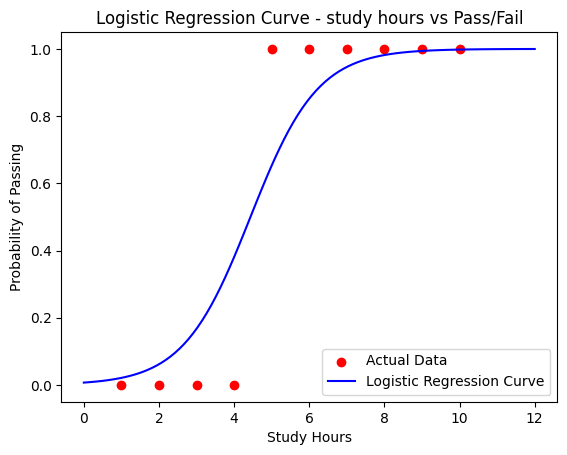

In [9]:
# Generate values for plotting
X_range = np.linspace(0, 12, 100).reshape(-1, 1)
x_prob = model.predict_proba(X_range)[:, 1]  # Get probability of class 1

# Plot
plt.scatter(X, y, color="red", label="Actual Data")
plt.plot(X_range, x_prob, color="blue", label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression Curve - study hours vs Pass/Fail")
plt.legend()
plt.show()

# **Heart disease DataSet**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [24]:
df=pd.read_csv("/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [27]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


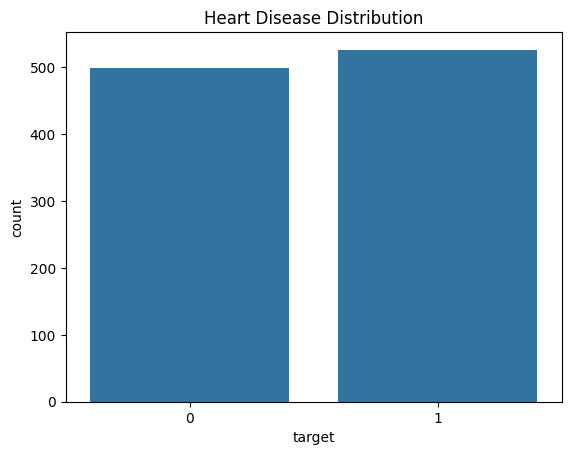

In [30]:
sns.countplot(x=df['target'])
plt.title("Heart Disease Distribution")
plt.show()

# 1. **Feature Selection and Preproccessing**


In [31]:
X = df.drop("target", axis=1)  # Drop the target column (independent variables)
y = df["target"]  # Define the target variable (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# **Train Logistic Regression Model**

In [32]:
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.80


In [39]:
#classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



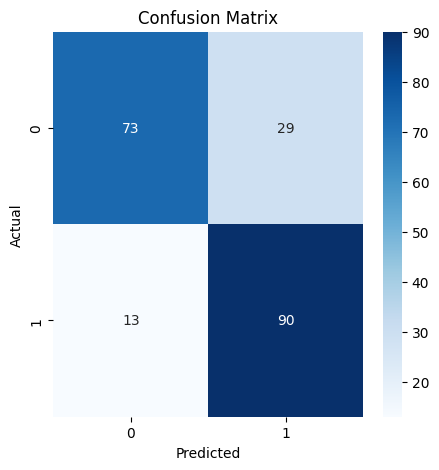

In [38]:
#Confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **What is a Decision Tree?**

A Decision Tree is a flowchart-like structure where:

Each internal node represents a decision based on a feature.

Each branch represents the outcome of that decision.

Each leaf node represents the final class label (for classification) or a continuous value (for regression).

**Example:**

Imagine you want to classify whether a person will buy a house based on their income and job stability.

A decision tree may look like this:

In [ ]:
#        Income?
  #     /       \
 #  High        Low
 #   |           |
#Job Stable?     No
#   /    \
# Yes    No


**If income is high:**

Check job stability:

Yes → Buy

No → Don't Buy

**If income is low** → Don't Buy

# **Entropy**

Entropy is the measure of randomness or impurity contained in a dataset.

**Steps to construct a Decision Tree Classifier**

Compute the entropy for target.

For every attribute/feature:

    Calculate entropy for all categorical values.

    Take average information entropy for the current attribute.

    Calculate gain for the current attribute.

Pick the highest gain attribute.

Repeat until we get the tree we desire.

# **Information Gain**

**Definition:**
Information gain (IG) measures how much "information" a feature provides about the class.

It is based on the decrease in entropy after splitting a dataset on an attribute.

The main parameter for constructing a Decision Tree.

An attribute with the highest information gain is tested/split first.

**Formula:**

Information Gain = Base Entropy – New Entropy

**Key Takeaways:**

Entropy Formula:

Entropy=−∑pi log2 (pi)

**Dataset Example:**

Total Samples: 8 photos

Winter Family Photo (Yes): 1

Not a Winter Family Photo (No): 7

**Entropy Calculation:**

Entropy=-(1/8) *log2 (1/8) - (7/8) * log2 (7/8)

=0.543

# **Gini impurity** (another measure for classification)
Another way to measure impurity is gini Index :

           Gini =1 - ∑ (pi^2)

**Example**:

Using the same dataset (6 "Yes" , 4 " NO)
      
      Gini = 1- (6^2/10 + 4^2/10)

      =1-(0.36 + 0.16) =0.48   
     

# **Using Social_Network_Ads Dataset**

In [40]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [43]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [44]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
395,False
396,False
397,False
398,False


In [45]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [52]:

# Selecting independent variables (Age and EstimatedSalary)
X = data.iloc[:, 2:4].values  # Independent Variables

# Selecting dependent variable (Purchased)
y = data.iloc[:, -1].values  # Dependent Variable (Target Variable)



array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# Training the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [57]:
y_pred = classifier.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


<Axes: >

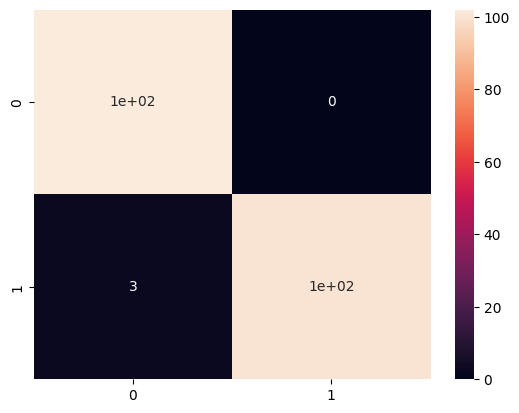

In [59]:
# Creating and visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



0.9853658536585366